In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Matplotlib is building the font cache; this may take a moment.


In [2]:
data = pd.read_csv('../datasets/ag_news_train.csv')

In [3]:
data.head()

,label,title,description
0,3,Wall St. Bears Claw Back Into the Black (Reuters),"Reuters - Short-sellers, Wall Street's dwindli..."
1,3,Carlyle Looks Toward Commercial Aerospace (Reu...,Reuters - Private investment firm Carlyle Grou...
2,3,Oil and Economy Cloud Stocks' Outlook (Reuters),Reuters - Soaring crude prices plus worries\ab...
3,3,Iraq Halts Oil Exports from Main Southern Pipe...,Reuters - Authorities have halted oil export\f...
4,3,"Oil prices soar to all-time record, posing new...","AFP - Tearaway world oil prices, toppling reco..."


In [4]:
data.shape

(120000, 3)

In [6]:
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
119995    False
119996    False
119997    False
119998    False
119999    False
Length: 120000, dtype: bool

In [7]:
data.duplicated().sum()

np.int64(0)

In [8]:
data.isnull()

,label,title,description
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
119995,False,False,False
119996,False,False,False
119997,False,False,False
119998,False,False,False


In [9]:
data.isnull().sum()

label          0
title          0
description    0
dtype: int64

In [10]:
import re
import string

In [11]:
data["title"].head(5)

0    Wall St. Bears Claw Back Into the Black (Reuters)
1    Carlyle Looks Toward Commercial Aerospace (Reu...
2      Oil and Economy Cloud Stocks' Outlook (Reuters)
3    Iraq Halts Oil Exports from Main Southern Pipe...
4    Oil prices soar to all-time record, posing new...
Name: title, dtype: object

In [13]:
# convert uppercase to lowercase

data["title"] = data["title"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [14]:
data["title"].head(5)

0    wall st. bears claw back into the black (reuters)
1    carlyle looks toward commercial aerospace (reu...
2      oil and economy cloud stocks' outlook (reuters)
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to all-time record, posing new...
Name: title, dtype: object

In [15]:
data["description"].head(5)

0    Reuters - Short-sellers, Wall Street's dwindli...
1    Reuters - Private investment firm Carlyle Grou...
2    Reuters - Soaring crude prices plus worries\ab...
3    Reuters - Authorities have halted oil export\f...
4    AFP - Tearaway world oil prices, toppling reco...
Name: description, dtype: object

In [16]:
data["description"] = data["description"].apply(lambda x: " ".join(x.lower() for x in x.split()))

In [17]:
data["description"].head(5)

0    reuters - short-sellers, wall street's dwindli...
1    reuters - private investment firm carlyle grou...
2    reuters - soaring crude prices plus worries\ab...
3    reuters - authorities have halted oil export\f...
4    afp - tearaway world oil prices, toppling reco...
Name: description, dtype: object

In [19]:
#remove unwanted links in the text data

data["title"] = data["title"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

data["description"] = data["description"].apply(lambda x: " ".join(re.sub(r'^https?:\/\/.*[\r\n]*','', x, flags=re.MULTILINE) for x in x.split()))

In [20]:
#remove punctuations in the text data

def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation,'')
    return text
data["title"] = data["title"].apply(remove_punctuations)

In [21]:
data["title"].head(10)

0       wall st bears claw back into the black reuters
1    carlyle looks toward commercial aerospace reuters
2         oil and economy cloud stocks outlook reuters
3    iraq halts oil exports from main southern pipe...
4    oil prices soar to alltime record posing new m...
5             stocks end up but near year lows reuters
6                   money funds fell in latest week ap
7    fed minutes show dissent over inflation usatod...
8                                 safety net forbescom
9               wall st bears claw back into the black
Name: title, dtype: object

In [22]:
#remove numbers in the data set

data["title"] = data["title"].str.replace('\d+', '', regex=True)

In [23]:
data["title"].tail(10)

119990              barack obama gets  million book deal ap
119991              rauffer beats favorites to win downhill
119992          iraqis face winter shivering by candlelight
119993    au says sudan begins troop withdrawal from darfur
119994      syria redeploys some security forces in lebanon
119995     pakistans musharraf says wont quit as army chief
119996                     renteria signing a topshelf deal
119997                      saban not going to dolphins yet
119998                                     todays nfl games
119999                         nets get carter from raptors
Name: title, dtype: object

In [28]:
#remove stopwords from the data set 

!pip install nltk

import nltk

In [30]:
nltk.download('stopwords', download_dir='../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Package stopwords is already up-to-date!


True

In [31]:
with open ('../static/model/corpora/stopwords/english', 'r')as file:
    sw = file.read().splitlines()

In [32]:
sw

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
data["title"] = data["title"].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [34]:
data["title"].head(10)

0                wall st bears claw back black reuters
1    carlyle looks toward commercial aerospace reuters
2             oil economy cloud stocks outlook reuters
3    iraq halts oil exports main southern pipeline ...
4    oil prices soar alltime record posing new mena...
5                    stocks end near year lows reuters
6                      money funds fell latest week ap
7       fed minutes show dissent inflation usatodaycom
8                                 safety net forbescom
9                        wall st bears claw back black
Name: title, dtype: object

In [38]:
#stemming - turning words like "going" to "go" 

from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [39]:
data["title"] = data["title"].apply(lambda x: " ".join(ps.stem(x)for x in x.split()))

In [40]:
data["title"].head(10)

0                  wall st bear claw back black reuter
1          carlyl look toward commerci aerospac reuter
2               oil economi cloud stock outlook reuter
3    iraq halt oil export main southern pipelin reuter
4    oil price soar alltim record pose new menac us...
5                       stock end near year low reuter
6                       money fund fell latest week ap
7            fed minut show dissent inflat usatodaycom
8                                 safeti net forbescom
9                         wall st bear claw back black
Name: title, dtype: object

In [41]:
#building a vacabulary

In [43]:
from collections import Counter
vocab = Counter()

In [44]:
vocab

Counter()

In [45]:
data

,label,title,description
0,3,wall st bear claw back black reuter,"reuters - short-sellers, wall street's dwindli..."
1,3,carlyl look toward commerci aerospac reuter,reuters - private investment firm carlyle grou...
2,3,oil economi cloud stock outlook reuter,reuters - soaring crude prices plus worries\ab...
3,3,iraq halt oil export main southern pipelin reuter,reuters - authorities have halted oil export\f...
4,3,oil price soar alltim record pose new menac us...,"afp - tearaway world oil prices, toppling reco..."
...,...,...,...
119995,1,pakistan musharraf say wont quit armi chief,karachi (reuters) - pakistani president pervez...
119996,2,renteria sign topshelf deal,red sox general manager theo epstein acknowled...
119997,2,saban go dolphin yet,the miami dolphins will put their courtship of...
119998,2,today nfl game,pittsburgh at ny giants time: 1:30 p.m. line: ...


In [47]:
for sentence in data["title"]:
    vocab.update(sentence.split())

In [48]:
vocab

Counter({'ap': 7778,
         'us': 5886,
         'reuter': 4262,
         'new': 4008,
         'say': 2867,
         'win': 2721,
         'ltbgtltbgt': 2559,
         'oil': 2497,
         'microsoft': 2322,
         'iraq': 2285,
         'kill': 2195,
         'updat': 2175,
         'afp': 1966,
         'stock': 1904,
         'price': 1821,
         'deal': 1801,
         'profit': 1746,
         'report': 1739,
         'get': 1737,
         'game': 1684,
         'plan': 1655,
         'take': 1583,
         'china': 1573,
         'back': 1533,
         'rise': 1497,
         'sale': 1483,
         'talk': 1471,
         'cut': 1463,
         'open': 1458,
         'may': 1432,
         'hit': 1371,
         'set': 1324,
         'world': 1297,
         'lead': 1294,
         'bush': 1261,
         'secur': 1242,
         'buy': 1241,
         'make': 1181,
         'ibm': 1176,
         'end': 1160,
         'top': 1152,
         'fall': 1150,
         'first': 1131,
     

In [49]:
len(vocab)

26544

In [50]:
data.shape

(120000, 3)

In [59]:
tokens = [key for key in vocab if vocab[key]>10]

In [60]:
len(tokens)

6016

In [62]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w' , encoding="utf-8")
    file.write(data)
    file.close()
save_vocabulary(tokens, '../static/model/vocabulary.txt')

In [63]:
#deviding data set to train and test

In [64]:
x = data['title']
y = data['label']

In [86]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.16666)

In [87]:
x_train.shape

(100000,)

In [88]:
x_test.shape

(20000,)

In [89]:
y_train

64994     1
21506     2
116734    3
7895      4
66732     4
         ..
117017    3
44118     4
245       4
30105     3
101562    2
Name: label, Length: 100000, dtype: int64

In [90]:
y_test

46677     4
99754     1
29670     1
11399     3
77114     1
         ..
114070    3
112088    2
74015     1
40642     2
102445    3
Name: label, Length: 20000, dtype: int64

In [91]:
x_train

64994                          myanmar secret regim oust pm
21506                                     rocki get schmidt
116734                     best buy q earn climb percent ap
7895                                intel lop pentium price
66732     colorado man get webarrang kidney transplant r...
                                ...                        
117017              fed move wireless web cell phone flight
44118                ibm claim fastest supercomput titlefor
245       news drought like dust bowl may unexcept prehi...
30105                      dollar slump region factori data
101562         immor unjust oppress dictatorship ltbgtltbgt
Name: title, Length: 100000, dtype: object

In [92]:
x_test

46677           microsoft vow fight latest patent reject
99754                                               seri
29670                      gunmen seiz brit two american
11399                 australia nation food fy earn tabl
77114                        indonesian cleric back dock
                               ...                      
114070                         homebrew ipod ad open eye
112088                      diamondback clinch glau sign
74015     musharraf identifi region demilitar ltbgtltbgt
40642                                      wenger get us
102445       wall street slog though tepid short session
Name: title, Length: 20000, dtype: object

In [93]:
#vectorization - changing words in to numbers(1,0)

In [94]:
def vectorizer(ds, vocabulary):
    vectorized_list = []

    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i]=1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype=np.float32)

    return vectorized_list_new

In [95]:
vectorized_x_train = vectorizer(x_train, tokens)

In [99]:
for i in vectorized_x_train[0]:
    print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [100]:
vectorized_x_test = vectorizer(x_test, tokens)

In [101]:
for i in vectorized_x_test[0]:
    print (i)

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
1.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0


In [102]:
#training data

In [103]:
vectorized_x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [104]:
y_train

64994     1
21506     2
116734    3
7895      4
66732     4
         ..
117017    3
44118     4
245       4
30105     3
101562    2
Name: label, Length: 100000, dtype: int64

In [105]:
#testing data

In [106]:
vectorized_x_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [107]:
y_test

46677     4
99754     1
29670     1
11399     3
77114     1
         ..
114070    3
112088    2
74015     1
40642     2
102445    3
Name: label, Length: 20000, dtype: int64

In [109]:
#checking if the dataset ballenced or not

In [110]:
y_train.value_counts()

label
4    25046
1    25015
3    24989
2    24950
Name: count, dtype: int64

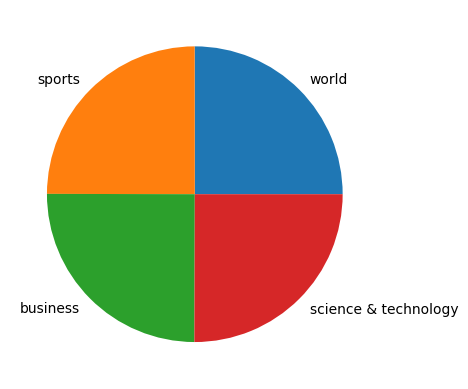

In [113]:
plt.pie(np.array([y_train.value_counts()[1],y_train.value_counts()[2],y_train.value_counts()[3],y_train.value_counts()[4]]), labels=['world', 'sports', 'business', 'science & technology'])
plt.show()

In [114]:
# Model trining and evaluation

In [115]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [116]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    re = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Training Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {re}\n\tF1 Score: {f1}')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred),3)
    pr = round(precision_score(y_act, y_pred),3)
    re = round(recall_score(y_act, y_pred),3)
    f1 = round(f1_score(y_act, y_pred),3)
    print(f'Testing Scores:\n\tAccuracy: {acc}\n\tPrecision: {pr}\n\tRecall: {re}\n\tF1 Score: {f1}')

In [117]:
#Logistic Regression

In [119]:
lr = LogisticRegression(max_iter=1000)
lr.fit(vectorized_x_train, y_train)

LogisticRegression(max_iter=1000)

In [ ]:
#checking the prediction is similer to the real one

In [120]:
y_train_pred = lr.predict(vectorized_x_train)

In [121]:
y_train_pred

array([1, 2, 3, ..., 4, 3, 2])

In [122]:
y_train

64994     1
21506     2
116734    3
7895      4
66732     4
         ..
117017    3
44118     4
245       4
30105     3
101562    2
Name: label, Length: 100000, dtype: int64

In [ ]:
#checking the accuracy 